<a href="https://colab.research.google.com/github/py222015328/CEE2/blob/main/Trabalho1_Brenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataframe:


,data,valor
0,2015-03-02,0.045513
1,2015-03-03,0.045513
2,2015-03-04,0.045513
3,2015-03-05,0.047279
4,2015-03-06,0.047279


        data     valor  taxa anual  valor original  taxa acumulada  acumulado
0 2015-03-02  0.045513    0.121500        1.000455        0.000455   0.045513
1 2015-03-03  0.045513    0.121500        1.000455        0.000910   0.091047
2 2015-03-04  0.045513    0.121500        1.000455        0.001366   0.136601
3 2015-03-05  0.047279    0.126499        1.000473        0.001839   0.183945
4 2015-03-06  0.047279    0.126499        1.000473        0.002313   0.231311


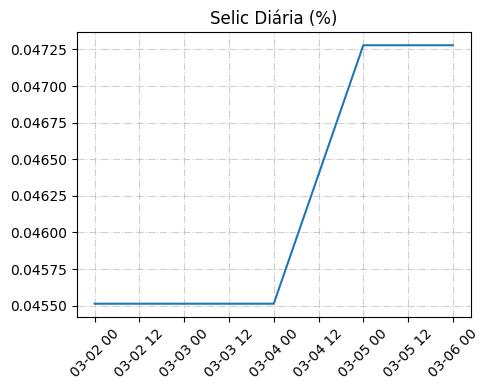

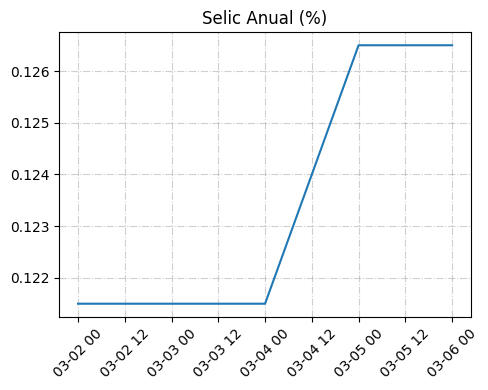

In [68]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


data_inicial="02/03/2015"
data_final="06/03/2015"

url =f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}"

#Fazer a requisição
response = requests.get(url)

if response.status_code == 200:
    dados = response.json()
    df = pd.DataFrame(data=dados)
    df['data'] = pd.to_datetime(df['data'],format='%d/%m/%Y')
    df['valor'] = df['valor'].astype(float)
    print('Dataframe:')
    display(df)
else:
    print("Erro ao acessar a API do Banco Central")


df['taxa anual'] = (1 + (df['valor']/100))**252 - 1

df['valor original'] = 1 + df['valor']/100
df['taxa acumulada'] = df['valor original'].cumprod() - 1
df['acumulado'] = df['taxa acumulada'] *100
print(df)

df1 = df[['data','valor','taxa anual', 'acumulado']]
df1

#Criação grafico 1
plt.figure(figsize=(5, 4))
plt.plot(df1['data'], df1["valor"])
plt.title('Selic Diária (%)')
plt.grid(True, linestyle='-.', alpha=0.6)
plt.xticks(rotation=45)  # Rotaciona os rótulos para evitar sobreposição
plt.tight_layout()
plt.show()
#Criação grafico 2
plt.figure(figsize=(5, 4))
plt.plot(df1['data'], df1["taxa anual"])
plt.title('Selic Anual (%)')
plt.grid(True, linestyle='-.', alpha=0.6)
plt.xticks(rotation=45)  # Rotaciona os rótulos para evitar sobreposição
plt.tight_layout()
plt.show()